In [1]:
import inspect

def print2(*args):
    frame = inspect.currentframe().f_back
    names = {id(v): k for k, v in frame.f_locals.items()}
    for arg in args:
        name = names.get(id(arg), '<unknown>')
        print(f"{name} = {arg}")

def vartodic(*args):
    frame = inspect.currentframe().f_back
    names = {id(v): k for k, v in frame.f_locals.items()}
    dic = {}
    for arg in args:
        name = names.get(id(arg), '<unknown>')
        dic[name] = arg
    return dic







aa = 0.25
bb = 0.87

print2(aa,bb)
vartodic(aa,bb)


aa = 0.25
bb = 0.87


{'aa': 0.25, 'bb': 0.87}

In [2]:
# oz to thinknes
# 1 oz ==> 1 oz of cupper by ft2
# 8,96 g/cm³ cupper
# 1 oz = 28,3495g
# 1ft = 30,48 cm
def oz_um_cal (oz):
  massekg = oz *28.3495/1e3
  # volum = area * thicknesss
  aream2 = (30.48*1e-2)**2
  rocukgm3= 8718 # this value is ajuste to found 105µm for 3 oz
  volumm3 = massekg/rocukgm3
  thickness= volumm3/aream2
  thicknessum= thickness*1e6
  return thicknessum
oz_um = {}
for oz in [0.5,1,2, 3]:
  thicknessum = oz_um_cal (oz)
  print(f"# {oz:.1f} oz ==> {thicknessum:.1f} µm")
  oz_um[oz]= thicknessum

# 0.5 oz ==> 17.50 µm
# 1.0 oz ==> 35.00 µm
# 2.0 oz ==> 70.00 µm
# 3.0 oz ==> 105.01 µm

# you can check again in
# https://pcbprime.com/pcb-tips/how-thick-is-1oz-copper/
print(oz_um)

# 0.5 oz ==> 17.5 µm
# 1.0 oz ==> 35.0 µm
# 2.0 oz ==> 70.0 µm
# 3.0 oz ==> 105.0 µm
{0.5: 17.501231839786204, 1: 35.00246367957241, 2: 70.00492735914482, 3: 105.00739103871722}


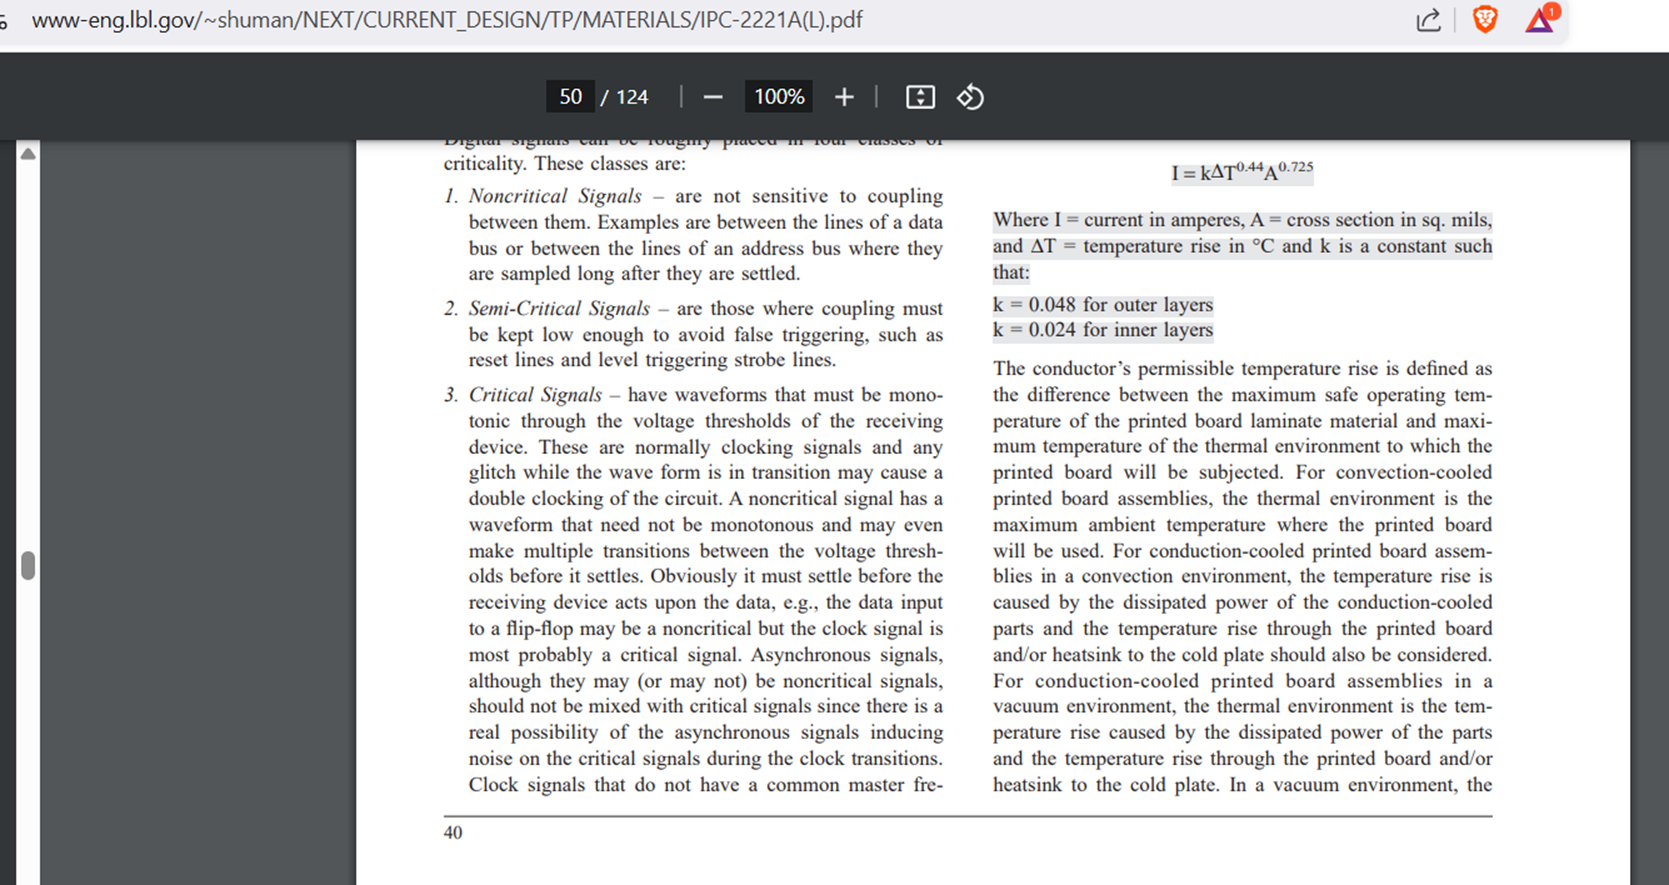

In [3]:
def ipc2221current(wmm, thicknessum, DT= 30, kind = "outer"):
  wmil =wmm /0.0254
  thmil = thicknessum /(0.0254*1000)
  areamils = wmil*thmil
  #print2(areamils)
  if kind =="outer":
    k = 0.048
  if kind =="inner":
    k = 0.024
  I = k*(DT**0.44) *(areamils**0.725)
  return I
wmm = 8.2
thicknessum = 72

I = ipc2221current(wmm, thicknessum, DT= 30, kind = "outer")
print2(I)

I = 30.077850976113666


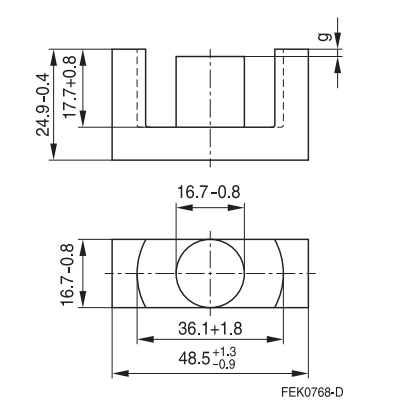

In [4]:
import pandas as pd
wmm = (36.1-16.7)/2-1
print2(wmm)
oz_signarios ={ "s1": [0.5,1], "s2":[1,2], "s3":[2,2]}

arr = []
brea=None
for DT in [20,30,40,50]:
  for (k, v ) in oz_signarios.items():
    oz_inner , oz_outer = v

    #print(oz_inner , oz_outer)
    um_inner = oz_um[oz_inner]
    um_outer = oz_um[oz_outer]
    #print2(oz_inner , oz_outer, um_inner, um_outer)

    Iouter = ipc2221current(wmm, um_outer, DT, kind = "outer")
    Iinner = ipc2221current(wmm, um_inner, DT, kind = "inner")
    Itotal= Iinner*2 + Iouter*2
    #print2(Iinner, Iouter, Itotal)

    #dic = vartodic(DT, oz_inner , oz_outer, um_inner, um_outer, Iinner, Iouter, Itotal)
    #print2(dic)
    dic = {'DT': DT,
    'oz_inner':  oz_inner ,
    'oz_outer':  oz_outer,
    'um_inner':  um_inner,
    'um_outer':  um_outer,
    'Iinner':  Iinner,
    'Iouter':  Iouter,
    'Itotal':  Itotal}
    arr.append(dic)


dfres = pd.DataFrame(arr)#.to_markdown()
dfres

wmm = 8.700000000000001


DT  oz_inner  oz_outer   um_inner   um_outer     Iinner     Iouter  \
0   20       0.5         1  17.501232  35.002464   4.710118  15.570713   
1   20       1.0         2  35.002464  70.004927   7.785356  25.736841   
2   20       2.0         2  70.004927  70.004927  12.868421  25.736841   
3   30       0.5         1  17.501232  35.002464   5.630046  18.611812   
4   30       1.0         2  35.002464  70.004927   9.305906  30.763476   
5   30       2.0         2  70.004927  70.004927  15.381738  30.763476   
6   40       0.5         1  17.501232  35.002464   6.389766  21.123297   
7   40       1.0         2  35.002464  70.004927  10.561648  34.914710   
8   40       2.0         2  70.004927  70.004927  17.457355  34.914710   
9   50       0.5         1  17.501232  35.002464   7.048965  23.302478   
10  50       1.0         2  35.002464  70.004927  11.651239  38.516680   
11  50       2.0         2  70.004927  70.004927  19.258340  38.516680   

        Itotal  
0    40.561661  
1    67.044396  
2    77.210524  
3    48.483715  
4    80.138763  
5    92.290427  
6    55.026125  
7    90.952717  
8   104.744131  
9    60.702886  
10  100.335839  
11  115.550041

In [5]:
oz_inner, oz_outer

(2, 2)

In [6]:
um_inner = oz_um[oz_inner]
um_outer = oz_um[oz_outer]

In [7]:
Iouter = ipc2221current(wmm, um_outer, DT, kind = "outer")
Iinner = ipc2221current(wmm, um_inner, DT, kind = "inner")

In [8]:
vartodic(DT, oz_inner , oz_outer, um_inner, um_outer, Iinner, Iouter, Itotal)

{'DT': 50,
 'oz_outer': 2,
 'um_outer': 70.00492735914482,
 'Iinner': 19.258340205566547,
 'Iouter': 38.516680411133095,
 'Itotal': 115.55004123339928}

# PCB LLC48V

In [9]:
def ipc2221current(wmm, thicknessum, DT=30, kind="outer"):
    """
    Calculate the allowable current for a PCB trace using the IPC-2221 standard.

    Parameters:
        wmm (float): Trace width in millimeters.
        thicknessum (float): Copper thickness in micrometers (µm).
        DT (float, optional): Allowed temperature rise in °C (default is 30°C).
        kind (str, optional): "outer" for external layer traces, "inner" for internal layer traces.

    Returns:
        float: Maximum allowable current in Amperes.
    """

    # Convert width from millimeters to mils (1 mil = 0.0254 mm)
    wmil = wmm / 0.0254  

    # Convert thickness from micrometers to mils (1 mil = 25.4 µm)
    thmil = thicknessum / (0.0254 * 1000)  

    # Calculate cross-sectional area in square mils
    areamils = wmil * thmil  

    # Determine constant k depending on whether it's an outer or inner layer
    if kind == "outer":
        k = 0.048
    if kind == "inner":
        k = 0.024

    # Apply IPC-2221 formula: I = k × (ΔT^0.44) × (Area^0.725)
    I = k * (DT ** 0.44) * (areamils ** 0.725)

    # Return calculated allowable current in Amperes
    return I


# Example input values
wmm = 8.2            # Trace width in mm
thicknessum = 72     # Copper thickness in µm

# Calculate current for outer layer with 30°C temperature rise
I = ipc2221current(wmm, thicknessum, DT=30, kind="outer")

# Print result (print2 should be replaced with print unless print2 is defined elsewhere)
print(I)


30.077850976113666


In [15]:
wmm= 0.9*(53.6-10.2)/2
wmm # Trace width in mm

19.530000000000005

In [21]:
         
thicknessum = 35   # Copper thickness in µm

# Calculate current for outer layer with 30°C temperature rise
Iouter = ipc2221current(wmm, thicknessum, DT=30, kind="outer")
Iinner = ipc2221current(wmm, thicknessum, DT=30, kind="inner")
Iouter, Iinner, Iouter+Iinner

(33.44830840380322, 16.72415420190161, 50.17246260570482)